In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

%matplotlib inline

# Hypothesis Testing 

The mathematical formalism of hypothesis testing can be charitably described as slightly opaque on first encountering it.  There is a tremendous amount of jargon that goes into hypothesis testing but arguably it is for good reasons:  in many cases we are making very important decisions based on our analysis so we must be precice about what we are doing.  We start with a definition.

A _test_ is a statistic that does not depend on unknown quantities and such that: $\psi$ that takes a value of either $0$ or $1$ (that is $\psi \in \lbrace 0,1\rbrace$)
- If $\psi = 0$ then we fail to rejct $H_0$
- If $\psi = 1$ then we reject $H_0$

This is just a mathematical way of saying that I would like to define a function of the data I collect and make a decision about whether to reject our null hypothesis based on this data.  I want this test to depend only on my data and possibly paramaters of the underlying statistical model that are known or discoverable prior to executing the test.  The way I will decide to reject, or fail to reject is based on the value I obtain from my test.  It can only have 2 values, $\lbrace 0,1 \rbrace$, and if the test returns a $0$, then I will fail to reject the null hypothesis, and if the test returns a $1$ then I will reject the null hypothesis.  The idea behind this formalism is simple.  I want to choose between two things: if I have a function that returns one of two values, then that function will determine my choice.  It seems like a lot of scafolding for a simple idea, but it allows us to write the idea compactly.

The next formalism that gets introduced is the notion of writing our test function as an indicator function.  Recall that an indicator function is a function that takes a value of $1$ on a particular set of values, and a value of $0$ elsewhere.  Indicator functions are written as $\mathbb{1}\lbrace R\rbrace$ where $R$ is some (measurable) set.  In the context of hypothesis testing we call $R$ the rejection region.  So the formalism

$$\psi_n(X_1,...,X_n) = \mathbb{1}\lbrace R\rbrace$$

can be read as we have a test that depends on our data $X_1,...,X_n$ and has a rejection region $R$.

For example if we have hypotheses set up like

$$H_0: \mu \le 30$$
$$H_1: \mu \gt 30$$

we could write our test as $\psi = \mathbb{1}\lbrace \overline{X}_n > C\rbrace$  for some $C$.  This is equivalent to saying that we are going to reject the null hypothesis if my data suggests that the value of my parameter of interest is much larger than the value I am supposing it has in the null hypothesis.  Our test is looking at the mean of our data ( $\overline{X}_n$ ) and deciding to reject based on the mean value being larger than some pre-determined constant $c$



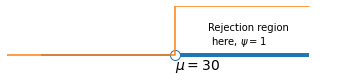

In [10]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(0,1)

# name some important points on the line
xmin = 1
xmax = 9
y = 0.1
theta_0 = 4
c = 5

# the fail to reject portion
plt.hlines(y, xmin, c)
plt.plot(5,y, 'o', ms=10, mfc="w")

# make rejection region line heavier weight
plt.hlines(y,c, xmax, lw=4)
plt.text(c+1,y+0.2,'Rejection region\n here, $\psi = 1$')

# label our parameter theta_0 and c
plt.text(c, y-0.25, r'$\mu=30$', fontsize=14)

# Plot our test function
x=[0.1,0.1,0.1,0.1,0.1,1,1,1,1,1]
plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.axis('off')
plt.show()

If we have hypothesis like

$$H_0: p=0.5$$
$$H_1: p \ne 0.5$$

our test might be written as $\psi=\mathbb{1}\lbrace |\overline{X_n} - 0.5| > C\rbrace$.

If we have hypothesis that are comparing means of populations $X$ and $Y$ then we might have hypotheses like

$$H_0: \mu_d \le \mu_c$$
$$H_1: \mu_d \gt \mu_c$$

then our test might be written as $\psi = \mathbb{1}\lbrace \overline{X_n} - \overline{Y_n} \gt C\rbrace$.

## Errors of a Test

A test can make errors in two ways
1. our null hypothesis is true ($\theta \in \Theta_0$) but we reject the null hypothesis.
2. our null hypothesis is false ($\theta \in \Theta_1$) but we fail to reject the null hypothesis.

$$
\begin{array}{r|c|c}
&\bf{\text{Fail to Reject Null}} & \bf{\text{Reject Null}}\\
\hline
H_0 \text{ true } (\theta \in \Theta_0)&\text{Correct Decision}&\text{Type 1 Error}\\
\hline
H_1 \text{ true } (\theta \in \Theta_1)&\text{Type 2 Error}&\text{Correct Decision}
\end{array}
$$


These are called _Type 1_ and _Type 2_ errors respectivley (sometimes _Type I_ and _Type II_).  As in the case of rejection regions and tests we also have some mathematical formalism to describe the probabilities of making either type of error.  We want to define something called the _power function_.  This is a function of the parameter of interest, $\theta$ and it is defined as the probability that the test rejects the null hypothesis given a particular value of the parameter of interest.  In math notation we write this as

$$\beta(\theta)=\mathbb{P}_{\theta}[\psi=1]$$

Let's take a bit closer look at $\mathbb{P}_\theta[\psi = 1]$. The power function of a test $\psi$ is defined to be the function of $\theta$ that tells us the probability of rejecting the null hypothesis depending on the value of the parameter of interest, $\theta$. We first consider the case where $\theta \in \Theta_0$.  In this case i will write it as follows to emphasize that we are looking at the case where $\theta \in \Theta_0$.

$$\beta(\theta)=\mathbb{P}_{\theta \in \Theta_0}\left[\psi=1 \right]$$

If our test returns a $1$, that means that our test has made a type 1 error ($\theta$ is in a region that corresponds to the null hypothesis being true). Since $\theta \in \Theta_0$ if our test $\psi =1$ we will be making a Type 1 error.

$$\beta(\theta)=\mathbb{P}_{\theta \in \Theta_0}\left[\psi \text{ makes a Type 1 error} \right]$$

So the power function evaluated at a parameter $\theta \in \Theta_0$ gives the probability of making a type 1 error.  We want this to be a small number.

On the other hand if $\theta \in \Theta_1$ and if $\mathbb{P}_\theta[\psi = 1]$ then we have the situation where our test is correctly rejecting the null hypothesis.  But what about type 2 errors?  We can compute the probability of those by taking the complement.  Suppose that $\theta \in \Theta_1$ and we look at

$$\beta(\theta) = 1 - \mathbb{P}_{\theta \in \Theta_1}[\psi=0]$$

We are assuming that $\theta \in \Theta_1$ so if I compute the value of my test and it is zero, then we will be making a Type 2 error.

$$\beta(\theta)=\mathbb{P}_{\theta \in \Theta_1}\left[\psi \text{ makes a Type 2 error} \right]$$

So here we actually want $\beta(\theta)$ to be large.

We are however faced with a dillema.  We want to be both large and small at the same time.  If we choose a test such that the chance of of making a type 1 error is small, this means that the test will make all of its errors be of type 2. The converse is true as well.  So what do we do?  The standard way to approach this is by using a heuristic called the Neyman-Pearson paradigm.  It prioritizes minimizing the percentage of Type 1 errors by deciding ahead of time on a fixed upper bound for the percentage of Type 1 errors, and then choose the boundaries of the test that minimizes Type 2 errors subject to the constraint on the pre-defined Type 1 error level. More formally, a test $\psi$ has a level of $\alpha$ if

$$\mathbb{P}_\theta[\psi=1] \le \alpha, \forall \theta \in \Theta_0$$

What this is saying is that my test will have a level $\alpha$ if for every possible choice of $\theta$ in $\Theta_0$ the probability of making a type 1 error is at most $\alpha$.  Sometimes this will be written as

$$\underset{\theta \in \Theta_0}{\max}\mathbb{P}_\theta[\psi=1] \le \alpha$$

There are a couple of things to note here however. Since we want to be able to compute $\mathbb{P}_{\theta \in \Theta_0}[\psi=1]$ we would realy like to know what value the test gives for all $\theta \in \Theta_0$ and we will not always have an easy way to do that.  Also in the real world we will never have a perfect test. We are only ever going to be able to look at finite samples from a population and that means that is our test might return different results depending on the particular sample that we have at hand. But, we would still want to bound the errors that our test makes, but we need to account for this additional variability. We have some tools at our disposal that can help, like the Central Limit Theorem and Slutsky's Lemma, and those tools can give us at least asymtotic results in some cases.

So how do we account for the asymptotic nature of our statistic?  We define a test $\psi=\psi_n$ to have an asymtotic level of $\alpha$ if

$$\underset{n\rightarrow \infty}{\lim}\underset{\theta \in \Theta_0}{\max}\mathbb{P}_\theta[\psi_n=1] \le \alpha$$

### Example: Building a test from a confidence interval

It is often the case that we can build a test using a confidence interval.  Recall that a confidence interval at level $1-\alpha$ is a set of values in our parameter space where the probability that the parameter is in that interval is at least $1 - \alpha$.  We call that interval $I = [A, B]$.  Thus we can write this as

$$\mathbb{P}_\theta(\theta \in [A,B]) \ge 1 - \alpha$$

So we have a way to bound the probability that our parameter is in a certain region.  Now how do we construct a test at level $\alpha$ for hypotheses of the form:

$$H_0: \theta=\theta_0$$
$$H_1: \theta \ne \theta_0$$

That is we are testing if our parameter is actually $\theta_0$ or if it is some other value.  One way to interpret the confidence interval is that there is very little reason to believe that our true parameter lies outside that interval. We built the confidence interval of level $1-\alpha$ so that the probability that our true parameter lies outside of that interval is at most $1-\alpha$. If we do find that our parameter $\theta$ is outside that interval, then we would want to reject our null hypothesis.  This leads to the natrual candidate for a test being

$$\psi = \mathbb{1}\lbrace \theta \notin [A, B]\rbrace$$

Recall what this means.

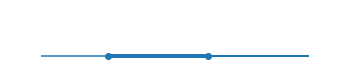

In [22]:
# set up the figure
fig, ax = plt.subplots(figsize=(6,1))
ax.set_xlim(0,10)
ax.set_ylim(-0.1,1)

# name some important points on the line
xmin = 1
xmax = 9
A = 3
B = 6
y = 0
theta_0 = 4
c = 5

# the fail to reject portion
plt.hlines(y,A,B, lw=4)
plt.plot([A,B],[y,y], 'o', ms=6)
#plt.plot(B,y, 'o', ms=8)

# make rejection region line lighter weight
plt.hlines(y, xmin, A)
plt.hlines(y,B,xmax, lw=2)

plt.xticks(ticks=[A,B],labels=['A', 'B'])

#plt.text(c+1,y+0.2,'Rejection region\n here, $\psi = 1$')

# label our parameter theta_0 and c
#plt.text(c, y-0.25, r'$\mu=30$', fontsize=14)

# Plot our test function
#x=[0.1,0.1,0.1,0.1,0.1,1,1,1,1,1]
#plt.plot(x,drawstyle="steps-post",label="$\psi(X_1,...,X_n)$")

plt.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.show()

So what level does this test have? The probability of rejecting is equal to the probability that our parameter $\theta$ is not in $I$.  We do not have a direct way of knowing what that probability is, but by taking the complementary probability we do have something that is controled: the confidence interval above.  This is all to say that
$$\mathbb{P}_{\theta_0}[\psi=1] = \mathbb{P}_{\theta_0}[\theta_0 \notin [A,B]]=1-\mathbb{P}_{\theta_0}[\theta_0 \in [A,B]]$$

If we look at our confidence interval we see that the probability $$\mathbb{P}_{\theta_0}[\theta_0 \in [A,B]] \ge 1 - \alpha$$

That is to say that the probability of $\theta_0$ being in our confidence interval is larger than $1-\alpha$. So we have the inequality 

$$1-\mathbb{P}_{\theta_0}[\theta_0 \in [A,B]]\le 1 - ( 1-\alpha) = \alpha$$

Therefore we have a test $\psi$ with level $\alpha$.

## Example using a Bernouli Distribution

Let $R_1, ..., R_n \overset{\mathrm{iid}}{\sim} \mathrm{Bernoulli}(p)$ and we want to test

$$H_0: p = 0.5$$
$$H_1: p \ne 0.5$$

Previously we have computed an asymptotic conservative 95% confidence interval for Bernoulli trials as

$$\mathit{I}_{\mathrm{conserv}} = \left[ \overline{R_n} - \frac{1.96}{2\sqrt{n}}, \overline{R_n} + \frac{1.96}{2\sqrt{n}}\right]$$

The important part here is that it is a conservative confidence interval in the sense that any other confidence intervals that we could report with the same level will at least be contained in the conservative interval.  So it is the confidence interval that maximizes

$$\underset{p \in \Theta_0}{\max}\mathbb{P}_p[\psi=1] \le \alpha$$

As above we are going to reject the null hypothesis if we find that $p=0.5$ is not in the interval $\mathit{I}_{\mathrm{conserv}}$.  Writing that in mathematical formalism we get the following

$$\psi = \mathbb{1}\lbrace 0.5 \notin \ \mathit{I}_{\mathrm{conserv}}\rbrace$$

Now, we have created an asymtotic confidence interval and we would like to see what the actual level of the test above is.  To do that we will first write down the definition of asymptotic confidence level

$$\underset{n\rightarrow \infty}{\lim}\mathbb{P}_{0.5}\left[ \psi = 1 \right]$$

Now as before we substitute the definition of $\psi = 1$ to get that 

$$\mathbb{P}_{0.5}\left[ \psi = 1 \right] = \mathbb{P}_{0.5}\left[ 0.5 \notin  \mathit{I}_{\mathrm{conserv}} \right] = 1 - \mathbb{P}_{0.5}\left[ 0.5 \in  \mathit{I}_{\mathrm{conserv}} \right]$$

Since we are in the asymptotic world and we have a conservative interval we rewrite this as

$$1 - \underset{n\rightarrow \infty}{\lim}\mathbb{P}_{0.5}\left[ 0.5 \in \mathit{I}_{\mathrm{conserv}}\right] \le 1 - (1-\alpha) = \alpha$$

Which just says that the asymptotic level of the test is $\alpha$.

## The P-value of a test

So the level of a test is a number that bounds the probability of making a type 1 error. The p-value of a test is a number that in some sense tells us which level we will start making type 1 errors.  To see this lets look at the above example but with different values for the level of the test.  Recall from above that we had the confidence interval

$$\mathit{I}_{\mathrm{conserv}} = \left[ \overline{R_n} - \frac{q_{\alpha/2}}{2\sqrt{n}}, \overline{R_n} + \frac{q_{\alpha/2}}{2\sqrt{n}}\right]$$

where $q_{\alpha/2}=1.96$ So changing the level of the test is equivalent to picking the appropriate $q_{\alpha/2}$.  Also our test will reject based on whether or not our parameter $p$ is in the interval.  Let's build a table based on various levels of our test (which correspond to the diffent levels of the conservative confidence interval $\mathit{I}_{\mathrm{conserv}}$ (note that this table is based on some data that we collected in a previous example and is reproduced here).

$$
\begin{array}{r|r|r|l}
\alpha   & q_{\alpha/2} & \mathit{I}_{\mathrm{conserv}} & \text{Decision}        \\
\hline
10\%     & 1.64         & [0.57, 0.72]                  & \text{reject}          \\ 
5\%      & 1.96         & [0.56, 0.73]                  & \text{reject}          \\
1\%      & 2.76         & [0.52, 0.77]                  & \text{reject}          \\
0.1\%    & 3.29         & [0.497, 0.79]                 & \text{fail to reject}  \\
0.01\%   & 3.89         & [0.47, 0.82]                  & \text{fail to reject}  \\
\end{array}
$$

We see that as we decrease the level of our test the confidence interval gets larger (which makes sense because as we want to be more and more sure that our interval contains our true parameter then the interval must get larger) at some point our test might get to the point where it will no longer rejct the null.  In the above example if we decrease the level of the test to $\alpha = 0.1\%$ then the confidence interval actualy contains the parameter value $p=0.5$ and that means that we do not have evidence at the $\alpha = 0.001$ level to reject the null hypothesis.  The value of $\alpha$ at which we change from rejecting to failing to reject the null hypothesis is called the p-value of the test.

Here again there is some mathematical formalism that we need to absorb.
#### Definition:

The (asymptotic) p-value of a test $\psi$ is the smallest (asymptotic) level $\alpha$ at which $\psi$ rejects $H_0$

We can think about it this way: a p-value $\le \alpha \iff H_0$ is rejected at the (asymptotic) level $\alpha$.

Now, how do we compute the p-value.  Let's consider our example above. Notice that we are making our decision based on whether $0.5$ crosses the lower boundary of our $\mathit{I}_{\mathrm{conserv}}$ which is given by

$$\overline{R_n} - \frac{q_{\alpha/2}}{2\sqrt{n}}$$

So that means we need to solve

$$\overline{R_n} - \frac{q_{\alpha/2}}{2\sqrt{n}}=0.5$$

And that is given by

$$q_{\alpha/2}=2\sqrt{n}\left( \overline{R_n} -0.5 \right)$$

By definition

$$\frac{\alpha}{2}=\mathbb{P}\left[ Z \gt q_{\alpha/2}\right], Z \sim \mathcal{N}(0,1)$$

so we can do the reverse lookup from a Gaussian table to get the p-value, or we can turn to software to compute it.

### Example calculation.

#### Setup.
Let $X_1,..., X_n \overset{iid}{\sim}\text{Ber}(p^*)$ for some unknown parameter $p^*$. Thus we have the statistical model $\left( \{ 0, 1\}, \{ \text{Ber}(p) \}_{p \in (0,1)}\right)$.  Consider the following null and alternative hypotheses:
$$H_0: p^* = 0.5$$
$$H_1: p^* \ne 0.5$$

Let

$$\mathit{T}_n = \sqrt{n}\left| \frac{\overline{X_n} - 0.5}{\sqrt{0.5(1-0.5)}} \right|$$

denote the test statistic.  Also let

$$\psi = \mathbb{1}\left( \mathit{T}_n \ge q_{\eta/2}\right)$$

denote the test where $q_\eta$ is the $1-\eta$ quantile of the standard Gaussian distribution.

1. In one run of the experiment we have 80 heads, and evaluated the test statistic $\mathit{T}_n$ on this data set to be $\mathit{T}_n = 2.82842$.  The asymptotic p-value for this data set is defined to be the smallest level $\alpha$ such that $\psi$ rejects $H_0$.  What is the asymptotic p-value for this data set?

If we denote $\text{Ber}(0.5)$ as $\mathbb{P}_{0.5}$ then the asymptotic level is given by

$$\underset{n\rightarrow \infty}{\lim}\mathbb{P}_{0.5}\left[ \psi = 1 \right] = \mathbb{P}_{0.5}\left[ \mathit{T}_n \ge q_{\eta/2}\right]$$

Since our test statistic is asymptotically normal this is equivalent to solving

$$\mathbb{P}\left( \left| Z \right| \gt q_{\eta/2} \right) = \eta$$

That is to say we need to find the smallest level $\alpha$ such that $\psi$ rejects $H_0$.  When will our test $\psi$ reject $H_0$?  If

$$\mathit{T}_n \gt $$


## Example Using the Poisson Distribution.
The set up is that we have a store and we have anecdotal evidence that there are usually 2 or less customers in the first hour of the store being open.  If it is actually the case that there are  2 or less cusomers then we may be justified in closing the store during that time.

To begin we start with a common statistical model of waiting times, the Poisson distribution, and we collect some data over $n$ days.  That is to say we have

$$X_1,... , X_n \sim \mathrm{Poisson}(\lambda) , \lambda \gt 0$$

where the $X_i$ are the number of customers in the first hour on day $i$.

There are a number of hypotheses that we could look at:
1) The null hypothesis $\mathrm{H}_0 : \lambda = 2$ and alternative hypothesis $\mathrm{H}_1 : \lambda \ne 2$. Find a test with asymtotic level 5%

2) The null hypothesis $\mathrm{H}_0 : \lambda \ge 2$ and alternative hypothesis $\mathrm{H}_1 : \lambda \lt 2$. Find a test with asymtotic level (at most) 5%

3) The null hypothesis $\mathrm{H}_0 : \lambda \le 2$ and alternative hypothesis $\mathrm{H}_1 : \lambda \gt 2$. Find a test with asymtotic level (at most) 5%

4) The null hypothesis $\mathrm{H}_0 : |\lambda - 2| \le 1$ and alternative hypothesis $\mathrm{H}_1 : |\lambda - 2| \gt 2$. Find a test with asymtotic level (at most) 5%



Text(2.1, 0, '$\\lambda_0$')

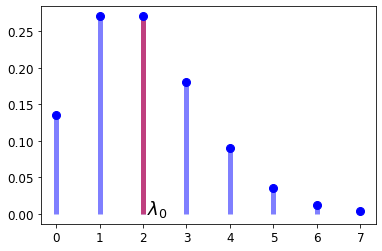

In [34]:
lda = 2
Poiss_2 = poisson(lda)

X = np.arange(poisson.ppf(0.01, lda), poisson.ppf(.999, lda))

fig, ax = plt.subplots(1,1)
ax.plot(X, poisson.pmf(X, lda), "bo", ms=8, label="Poisson PMF")
ax.vlines(X, 0, poisson.pmf(X, lda), colors='b', lw=5, alpha=0.5)
ax.vlines(2.01,0, poisson.pmf(2, lda), colors='r', lw=5, alpha=0.5)
ax.text(2.1,0,"$\lambda_0$", fontsize=18)



Let's start by looking at the first hypothesis.  We have a partition of our parameter space into two subsets, $\Theta_0 = \lbrace 2 \rbrace$ and $\Theta_1 = \lbrace \lambda \in (0, \infty) \backepsilon \lambda \ne 2 \rbrace$ where the null hypothesis is that $\lambda \in \Theta_0$ and the alternative hypothesis is that $\lambda \in \Theta_1$.

We want to come up with a test that will let us decide, based on the data that we observe ($X_1, ..., X_n$), whether there is enough evidence to reject our null hypothesis $H_0$.  That is we are looking for a function $\psi_n(X_1,...,X_n)$ that takes values of either $0$ or $1$ that will decide between $\mathrm{H}_0$ and $\mathrm{H}_1$ given the data that we observe.  Specifically the test will be equal to zero if our test decides it can not reject the null, and it will be 1 if it decides that we should reject the null.

Before looking for that test let's look at the types of errors that we might encounter in any test we come up with.  If we conclude that we reject the null hypothesis but the null hypothesis is true we will make a type 1 error.  We would like to be able to control the probability of this type of error occouring. To put it another way we would like to fix a number ahead of time that gives an upper bound to this probability.  That is just what we mean by controlling the error. The question then becomes what is this probability that we want to control?  We can write this probability as

$$\mathbb{P}_\lambda(\psi_n(X_1,...,X_n) = 1)$$

where we read this as the probability under some $\lambda$ that our test produces a result of $1$.  This is just what it means to reject the null hypothesis.  Our $\psi_n = 1$ if the test rejects the null hypothesis. It is this probability that we want to control so let's give this upper bound the name $\alpha_{\psi}(\lambda)$.  Note that this number will depend on the particular test we use, $\psi$, and the paramater we are estimating, $\lambda$.  To summarize, the probability of a type 1 error for a test $\psi$ with a particular parameter $\lambda$ can be written as

$$\alpha_{\psi}(\lambda) = \mathbb{P}_\lambda(\psi_n(X_1, ..., X_n) = 1), \lambda \in \Theta_0$$

where the only new part is that we are interested in this probability when the parameter $\lambda$ is actually in $\Theta_0$.  And our desire is to fix this value $\alpha_{\psi}(\lambda)$ ahead of time so that we have a fixed maximum value for our test making a type 1 error.

On the other hand we could also make an error where we incorrectly fail to reject the null hypothesis.  In this case our test produces a value of $0$ but in fact the null hypothesis is not true.  That is $\lambda \in \Theta_1$.  That is we will be making a type 2 error and we would like to be able to control that as well.  In this case the probability that we want to control is

$$\mathbb{p}_\lambda(\psi_n(X_1, ..., X_n) = 0)$$

where this is the probability that under some $\lambda$ our test produces a result of $0$ but in fact $\lambda$ is in $\Theta_1$.  To summarize, the probability of a type 2 error for a test $\psi$ with a particular parameter $\lambda$ can be written as

$$\beta_\psi(\lambda) = \mathbb{P}(\psi_n(X_1, ..., X_n)=0), \lambda \in \Theta_1$$

Now the question is finding a test that strikes a balance between these two errors.

The typical thing is to look at type 1 errors first and fix that value ahead of time.  Why?  Well, the type 1 error is the probability of taking action where in fact there is not enough evidence to act.  We would typically not want to act if we do not have evidence that taking that action is warrented, so we want to controll the probability of taking unwaranted action. You might think of it like "innocent until proven guilty". We do not want to send someone to jail if in fact they are actually innocent.  

So what should $\alpha_\psi(\lambda)$ be?  Since it is the probability of acting when there is actually no reason to act we typically want this to be small; it is a measure for how certain we want to be before we take action. In frequentist terms it represents how often we are willing to be wrong based on the data that we see.  Or in Baysean terms it is how certain we are that we will not be acting in error. So ahead of time we might want to fix our tolerance for type 1 errors at a specific level.  This is not surprisingly called the level of the test. Let's now look at the mathematical fomalism associated with these ideas.

We call $\alpha$ the level of the test where $\alpha$ is the largest value of type 1 errors you will see given a particular test where the paramater of interest is actually in the null hypothesis region.  Or symbolically we are looking at $\mathbb{p}_\lambda(\psi_n(X_1, ..., X_n) = 1)$ and we want to look at all tests where the paramater of interest is actually in $\Theta_0$.  That is we are looking at all the $\alpha_{\psi}(\lambda)$ where we want the largest value that those can take is $\alpha$.  We write this as:

$$\sup_{\lambda \in \Theta_0}\mathbb{P}_\lambda(X_1, ..., X_n) = 1) = \alpha$$

In general this is a hard problem because we would need to know what the actual distribution of $\psi_n$ is.  To get around this limitation we can look for a slightly more relaxed condition where we are only concerned that we know asymtotically what the distribution of $\psi$ is.  And in that case we are looking at the following:

$$\sup_{\lambda \in \Theta_0}\limsup_{n\rightarrow\infty}\mathbb{P}_\lambda(X_1, ..., X_n) = 1) = \alpha$$

Sometimes this can simplify calculations since we can argue only about the maximum value that $\mathbb{P}_\lambda(X_1, ..., X_n) = 1)$ takes.

Now how do we procede?  We first find a test statistic $T_n$ that is a measure of how far away any particular candidate for our parameter of interest $\lambda$ is from the paramater as stated in our null hypothesis, $\lambda_0$.  This test statistic is dependent on the data that we collect, so we can say the test statistic is comparing the likely value of our parameter given our data with the value of the paramater stipulated by the null hypothesis. So our test statistic will be large if the parameter value suggested by our data is far away from $\lambda_0$ and it will be small when the two are close.  If it turns out that our test statistic can be written down exactly depending only on the value of the parameter under the null hyptothesis, and does not depend on any other variables then we call that test statistic a _pivot_.

Once we have found this test statistic then controling for a type 1 error is the same as having the value of $T_n \gt S$ for some value $S$, then our test can be written as
$$\psi_n=\mathbb1\lbrace T_n \gt S\rbrace$$
and we then need to find a suitable $S$ such that
$$\mathbb{P}(\mathbb1\lbrace T_n \gt S\rbrace) = \alpha$$

### Finding a Test.

The goal is to find a fuction that can be used to distinguish between $H_0$ and $H_1$.  To do this we will find a test statistic $T_n$, and to get at that test statistic we often first look at an estimator for our parameter of interest, $\lambda$.  In the case at hand we know that the Poisson distribution has the same first and second moments, $\mathbb{E}[X_i] = \lambda$, and $\mathrm{Var}(X_i)= \lambda$. So let's use the average of my samples (my sample mean, or as it is sometimes called the empirical mean) as an estimator for $\lambda$ which we typically denote with $\hat{\lambda}$.
$$\hat{\lambda} = \frac{1}{n}\sum_{i=1}^{n}X_i$$
We know that by the Law of Large Numbers
$$\hat{\lambda} = \frac{1}{n}\sum_{i=1}^{n}X_i\overset{\mathbb{P}_\lambda}{\rightarrow}\lambda$$
and thus a distance function based on this might be a good candidate for a test statistic.  Moreover since we are ultimately looking for satisfying an asymtotic level of at most $\alpha$.  Recall that what that means is we want to have a guarantee that the probability of making a type 1 error is at least asymtiotically less than $\alpha$.  We can make use of the Central Limit Theorem to help us here.  The C.L.T. gives us that
$$\sqrt{n}\left(\frac{\hat{\lambda} - \lambda}{\sqrt{\lambda}}\right) \overset{\mathrm{D}}{\rightarrow}\mathcal{N}(0,1)$$
And with the Gaussian distribution we have good knowledge on how to mange the probabilities by restricting the range of values that a paramater might take.


So, what should our function $T_n$ be?  We want it to be small when it is indicating that $H_0$ should not be rejected. And we want it to be large when it is indicating that $H_0$ should be rejected.  Let's take a look at
$$\sqrt{n}\left(\frac{\hat{\lambda}-\lambda}{\sqrt{\lambda}}\right)$$
When $\hat{\lambda}$ is close to $\lambda$ and larger than $\lambda$ then the expression will be small and positive, which is good.  But what happens if the true $\lambda$ is much larger than the true $\lambda$?  In that case the expression will be negative and will get larger for larger differences.  So what we want is actually the absolute value of this expression
$$\mathrm{T}_n = \left|\sqrt{n}\left(\frac{\hat{\lambda}-\lambda}{\sqrt{\lambda}}\right)\right| = \sqrt{\frac{n}{\lambda}}\left| \hat{\lambda} - \lambda \right|$$

Now, what should we use for $\lambda$?  In our case $H_0$ is testing for $\lambda = 2$ so why not use $\lambda = \lambda_0 = 2$? Well, if $\lambda$ actually turns out to not be equal to 2, then the C.L.T will not hold for our equation above.  But remember that we are controling for a type 1 error.  Those errors occur if we reject when our null hypothesis is true, so we are already in the regieme where we are assuming that our true paramater $\lambda\in \Theta_0$ so for the purposes of controling type 1 errors we can make the assumption that $\lambda = \lambda_0 = 2$.

To rephrase this in the symbology that we used at the beginning
$$\begin{align}\alpha_\psi(2) &= \mathbb{P}(\psi(X_1,...,X_n)=1) &= \mathbb{P}_2(\mathrm{T}_n>S) &= \mathbb{P}_2\left(\sqrt{\frac{n}{\lambda}}\left| \hat{\lambda} - \lambda \right|\ge S\right)\end{align}$$
And this is saying that our upper bound on type 1 errors $\alpha_\psi(\lambda=2)$ can be controled by looking at the probability that $\left|\sqrt{n}\frac{\hat{\lambda} - 2}{\sqrt{2}}\right|$ is larger than some $S$.  But by the C.L.T. we have that $\sqrt{n}\frac{\hat{\lambda} - 2}{\sqrt{2}}$ is asymtotically normal.  So asymtotically we have to control $\mathbb{P}(|Z|\gt S)$ which we know how to do.

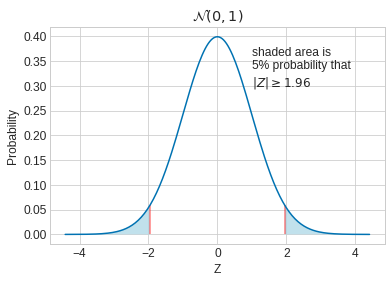

In [66]:
# Create an array of points to use as the x-coordinates for plotting the normal distribution
from scipy.stats import norm
x_min = norm.ppf(0.000005) # we will plot 99.999 % of the normal curve.
x_max = norm.ppf(0.999995)
x = np.linspace(x_min, x_max, 201)

# create a figure and an axes
fig, ax = plt.subplots()

# plot our normal function.
ax.plot(x, norm.pdf(x), label='Normal Distribution\n scipy.stats.norm.pdf(x)')

# add axis labels, title and legend
ax.set_xlabel('Z')
ax.set_ylabel('Probability')
ax.set_title('$\mathcal{N}(0,1)$')
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)
x_left=np.linspace(x_min,-1.96,201)
x_right=np.linspace(1.96,x_max,201)
ax.fill_between(x_left, norm.pdf(x_left), alpha=0.75, facecolor='lightblue')
ax.fill_between(x_right, norm.pdf(x_right), alpha=0.75, facecolor='lightblue')
ax.text(1,0.3,"shaded area is \n5% probability that\n$|Z| \geq 1.96$")
#ax.legend()


Consider the figure.  By using symetry and complements of probabilities we can conclude that we want
$$2\left(1-\Phi(S)\right) = \alpha$$
where $\Phi(x)$ is the cdf of a standard Gaussian distribution and the equality is asymtotic equality.  By asymtotic equality we mean that the equation is true as $n$ tends to $\infty$. With a bit of algebra we see that we want
$$\Phi(S) = 1 - \frac{\alpha}{2}$$
which is just saying that we are looking for $1$ minus the $\alpha/2$ quantile of the standard normal distribution.

So, that controls our type 1 error.  What does our test do for type 2 errors?  How do we address those in the framework we have currently.  Let's look at
$$T_n=\left|\sqrt{n}\left(\frac{\hat{\lambda} - 2}{\sqrt{2}}\right)\right|$$
for the case when the true $\lambda$ is actually in  $\Theta_1$.  That is we are looking at the following expression:
$$\mathbb{P}_\lambda(T_n < s)=\mathbb{P}_\lambda \left( \left| \sqrt{n} \left( \frac{\hat{\lambda} - 2}{\sqrt{2}}\right) \right| \lt s \right)$$
First, consider just this part:
$$\frac{\hat{\lambda} - 2}{\sqrt{2}}$$
and we ask what happens as $n$ gets large.  Since we are considering the case where the true $\lambda \ne 2$ then $\hat{\lambda} -\lambda \ne 0$ and then the entire expression will tend towards some non-zero value in absolute value.  This means that as $n \rightarrow \infty$ the expresson

$$\sqrt{n}\left|\left(\frac{\hat{\lambda} - 2}{\sqrt{2}}\right)\right|$$

will also tend to $\infty$ and thus asymtoticaly
$$\mathbb{P}_\lambda \left( \left| \sqrt{n} \left( \frac{\hat{\lambda} - 2}{\sqrt{2}}\right) \right| \lt s \right) = 0$$
we have that our type 2 error will also tend to 0.

### Hypothesis Test 2: $\lambda \le 2$

This is a more realistic hypothesis since we are not really that interested in the exact number of customers being equal to two as we had in the first hypothesis, but are more interested in whether there are 2 or fewer customers in the firts hour.  That is we frame our test in the following way.  We will maintain the status quo if we determine that there are more than 2 customers per hour, but we will make a change if there are two or fewer customers.  That means we want a test that will distinguish between the null hypothesis $\mathrm{H}_0 : \lambda \gt 2$ and the alternative hypothesis $\mathrm{H}_1 : \lambda \le 2$. We want the test to have asymtotic level (at most) 5%.

Notice that this is a 1 sided test since we are looking for evidence that our parameter of interest is less than some threshold value.  Previously we were looking for evidence that our parameter of interest was either larger or smaller than some threshold value.

So what will our test look like.  As above we can use the Central Limit Theorem which yields the followig expression:
$$\sqrt{n}\frac{\lambda - \hat{\lambda}}{\sqrt{\lambda}}\underset{n\rightarrow\infty}{\overset{D}{\rightarrow}}\mathit{N}(0,1)$$

and we want to find some function $T_n$ that is large when there is evidence that $\lambda \lt 2$ and small otherwise.  We consider the following:
$$T_n = \frac{2 - \hat{\lambda}}{\sqrt{2}}\sqrt{n}$$
and note that if it turns out our true parameter is 2 or less, then the expression above will be $\le 0$ and if the true parameter is larger than 2, then the expression will be $\gt 0$.

What about controling for errors?  We consider type 1 errors first.  We will be making a type 1 error if our true parameter is than 2 ($\lambda \in \Theta_0$), but we reject the null hypothesis.  That is we have more than two customers in the first hour but we close for that hour anyway.  This is controlled if we look at 

$$\alpha_\psi(\lambda) = \mathbb{P}_\lambda(T_n \gt s)=\mathbb{P}_\lambda \left( \sqrt{n} \frac{2 - \hat{\lambda}}{\sqrt{2}}\gt s \right) $$

Here we notice that by the law of large numbers, if $\lambda \gt 2$ $\frac{2 - \hat{\lambda}}{\sqrt{2}} \lt 0$ as $n \rightarrow \infty$.  
